# Introduccción

La regresión lineal es uno de los modelos de aprendizaje supervisado en el ambito del Machine Learning. El objetivo de este algoritmo es estimar una valor continuo $Y$ a partir de un vector de características $X$. Este modelo no es nuevo, pues tiene sus fundamentos en la Estadística. Se podría decir que es un repaso del modelo de regresión lineal de Mínimos Cuadrados Ordinarios, donde, en este caso, no tenemos el objetivo de hacer estimaciones, sino el objetivo es hacer predicciones.

Tenemos $X \in \mathbb{R}^k$, $Y \in \mathbb{R}$ y la muestra es de tamaño $n$. Como recordará. la forma relacional de estas variables se da la forma, $Y = f(X) + u$, en este caso limitaremos la familia de funciones sobre las que queremos aprender; por lo tanto, planteamos la hipótesis de linealidad, de tal forma que nuestra forma funcional se presenta de la siguiente manera:
$$f_{\beta}(X) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_k x_k$$
Tendremos una vector de parámetros de la forma, $\beta \in \mathbb{R}^{k+1}$.

Podemos adoptar la manera de agregar un columna de constantes, de tal manera que $x_0 = 1$, por lo que tendremos la forma funcional de la siguiente manera:
$$f_{\beta}(X) = \beta_0 x_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_k x_k$$

Si reducimos la expresión:
$$f_{\beta}(X) = \sum_{i=1}^k \beta_i x_i$$

Podemos expresar todo lo visto en su forma matricial:
$$Y = X\beta + u$$
Donde:
\begin{equation}
    Y = \begin{pmatrix}
        y_1 \\
        y_2 \\
        \vdots \\
        y_n
    \end{pmatrix}
\end{equation}
La matriz que contiene los valores de la variable objetivo (i.e. la variable que queremos predecir) para las $n$ muestras del conjunto de datos.

\begin{equation}
    X = \begin{pmatrix}
        1 & x_{1,1} & \ldots & x_{1,k}\\
        1 & x_{2,1} & \ldots & x_{2,k}\\
        \vdots & \vdots & \ddots & \vdots\\
        1 & x_{n,1} & \ldots & x_{n,k}
    \end{pmatrix}
\end{equation}
La matriz que contiene los valores de las $k$ características $(x_{i,j})$ del conjunto de datos.

\begin{equation}
    \beta = \begin{pmatrix}
        \beta_0 \\
        \beta_1 \\
        \vdots \\
        \beta_k
    \end{pmatrix}
\end{equation}
La matriz de coeficientes del modelo de regresión, **que se va a aprender**

\begin{equation}
    u= \begin{pmatrix}
        u_1 \\
        u_2 \\
        \vdots \\
        u_n
    \end{pmatrix}
\end{equation}
la matriz de los errores.

Si definimos la expresión antes vista de la siguiente manera, $u = Y - X\beta$. Y como el objetivo de los <font color=blue> Mínimos Cuadrados Ordinarios</font> es minimizar este error, llegaremos a la siguiente expresión optimizando dicha expresión:
$$\hat{\beta} =(X'X)^{-1}(X'Y)$$

Gráficamente podemos expresar esta relación de la siguiente manera:

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

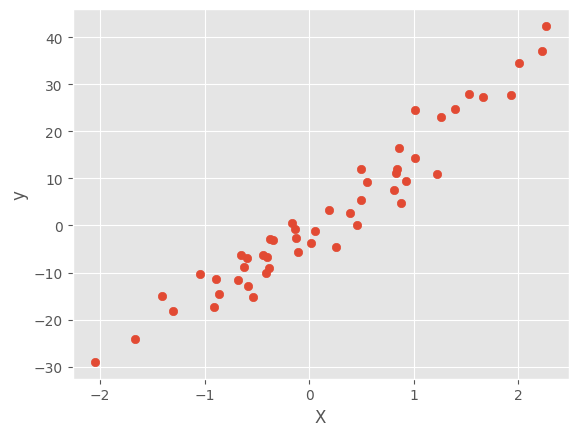

In [2]:
X, y = make_regression(n_samples=50, n_features=1, n_informative=1, n_targets=1, noise=5, random_state=43)

plt.figure()
plt.scatter(X[:,0], y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Aproximamos la recta que se ajusta a esta nube de puntos.

In [3]:
X.shape

(50, 1)

In [4]:
n = len(X)
k = X.shape[1]
#Agregamos una columna de constantes
X_0 = np.ones((n,1))
X = np.concatenate((X_0, X), axis=1)

# beta_hat = (X'X)*(-1)(X'Y)
beta_hat = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
beta_hat

array([-0.12197581, 15.45017385])

Graficamos la recta:
$$\hat{y} = \beta_0 + \beta_1 x_1$$

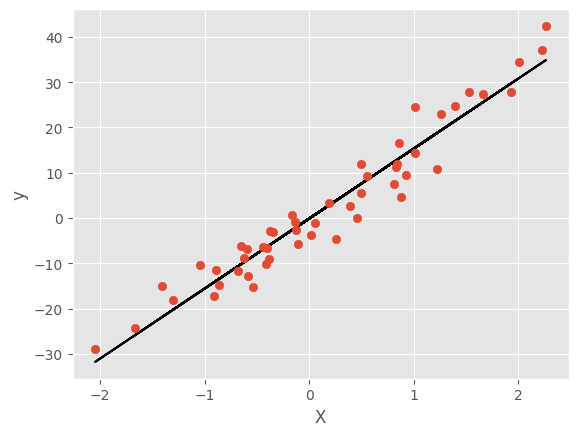

In [8]:
plt.figure()
plt.scatter(X[:,1], y, zorder=10)
plt.plot(X[:,1], beta_hat[0] + beta_hat[1] * X[:,1], color = 'black')
plt.xlabel('X')
plt.ylabel('y')
plt.show()